# PyTorch Workflow :

https://www.learnpytorch.io/01_pytorch_workflow/

 1 - Get data ready & turn them into tensors :
  * torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader


 2 - Build or pick a pretrained model
  * 2.1 - Pick a loss function & optimizer : torch.nn, torch.nn.Module, torchvision.models & torch.optim
  * 2.2 - Build a training & testing loop


 3 - Fit the model to the data and make prediction

> Ajouter une citation



 4 - Evaluate the model :
  * torchmetrics


 5 - Improve through experimentation :
  * torch.utils.tensorboard


 6 - Save and reload the trained model


## 1 - Data :

In [ ]:
import torch
from torch import nn # nn contains all of pytorch building block for neural network
import matplotlib.pyplot as plt

### Create :

In [ ]:
## Know parameters to create the data :
weight = 0.7
bias = 0.3

## Create :
start=0
end=1
step=0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

len(X), len(y), X[:10], y[:10]

(50,
 50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split into training and testing set :

* Generalization : ability to perform well on data it hasn't seen before
* Sometimes : training, testing & **validation set**
* Usually : 80/20 or 70/30, depends on data

In [ ]:
train_split=int(0.8*len(X))

X_train, y_train=X[:train_split],y[:train_split]
X_test, y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### Visualisation :

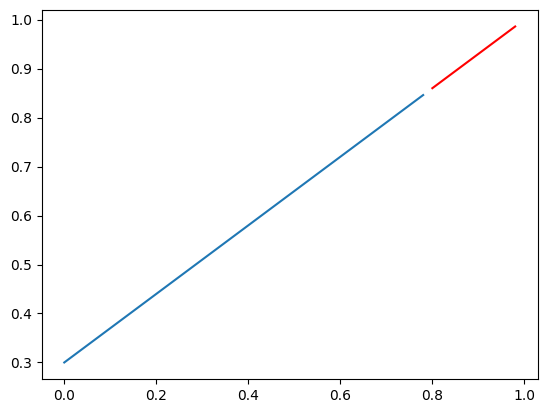

In [ ]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test,"r")

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(7,5))

  plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Test data")

  if predictions is not None :
    plt.scatter(test_data, predictions, c='r',s=4, label="Predictions")

  plt.legend(prop={"size":14});

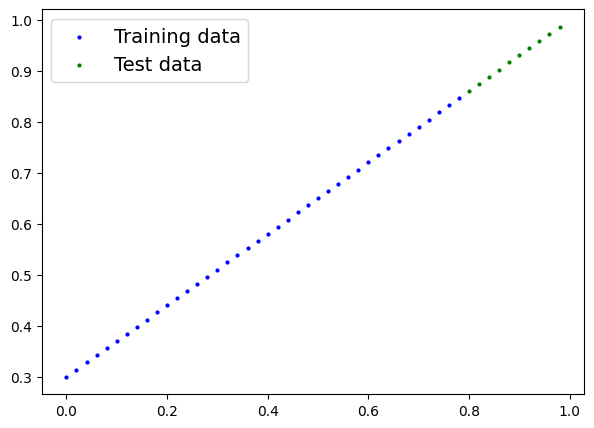

In [ ]:
plot_predictions()

## 2 - Build a model :

### Pytorch model building essentials :

* torch.nn : all buildings for neural networks

* torch.nn.Parameter : what parameters our model try and learn

* torch.nn.Module : base class for all neural networks modules, if we subclass it we should overwrite forward()

* torch.optim : where the optimizers in Pytorch live, for gradient descent

In [ ]:
class LinearRegressionModel(nn.Module) : ## nn.Module contains all building blocks for neural networks
  def __init__(self) :
    super().__init__()
    #initialise model param
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor :
    #Define the computation in the model ; x is the input data
    return self.weights*x+self.bias

In [ ]:
# Fix the random seed :
torch.manual_seed(42)

# Create an instance of the model :
model_0=LinearRegressionModel()

# Check the parameters of the model :
print(".parameters() : ",list(model_0.parameters()))
print("\nState_dict : ",model_0.state_dict())

.parameters() :  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

State_dict :  OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Predictions without training :

In [ ]:
model_0.eval()
with torch.inference_mode() : # Turn off the gradient and is faster than just : y_preds=model_0(X_test)
  y_preds=model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

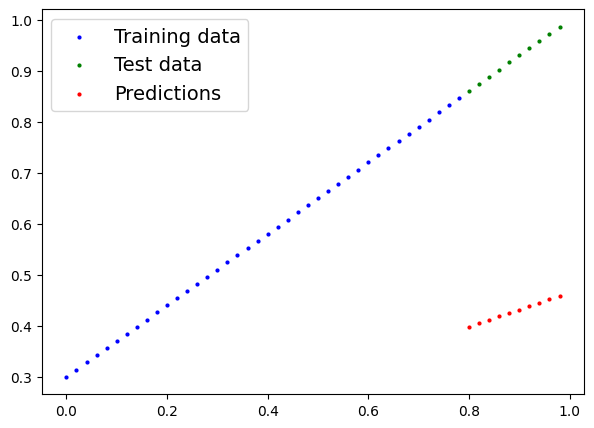

In [ ]:
plot_predictions(predictions=y_preds)

## 3 - Training & Testing :

* Loss function : measure how poor a prediction is compared to the ideal (lower is better)

* Optimizer : Ajusts the model's param by taking the loss of the model into account to improve the loss fonction

* We need : training loop, testing loop;

### Loss & Optimizer :

In [ ]:
# Setup a loss func
loss_fn= nn.L1Loss()

# Setup an optimizer
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.01)

### Training & Testing loop :

1 - Training loop :
 * Forward propagation (=> predictions on data)
 * Calculate the loss (pred vs ground truth)
 * Optimizer zero grad
 * Backpropagation (calculate the gradients of each parameters with respect to the loss)
 * Gradient descent (adjust parameters to improve loss)

2 - Testing loop :
 * Forward propagation
 * Calculate the loss
 * Print results

In [ ]:
torch.manual_seed(42)

epochs = 200 # number of loop through data

#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training :
# Loop through data :
for epoch in range(epochs) :
  #Set the model to training mode
  model_0.train() # set all param that requires grad to requires grad

  #Forward prop :
  y_pred=model_0(X_train)

  #Calculate loss :
  loss=loss_fn(y_pred,y_train)

  # Optimizer zero grad :
  optimizer.zero_grad()

  # Backprop :
  loss.backward()

  # Gradient descent :
  optimizer.step() # By default how the optimizer changes wil accumulate through the loop so we have
                   # to zero them above (zero grad)
  #### Testing:
  model_0.eval() #turns off settings in the model not needed for evaluation/testing
  with torch.inference_mode() : # turns off grad tracking & a couple other things behind the scene
    #Forward prop
    test_pred=model_0(X_test)

    #Calculate Loss :
    test_loss=loss_fn(test_pred,y_test)

  # Print what's happining :
  if epoch % 20 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss:{loss} | Test loss : {test_loss}")
    # Print model state_dict
    print(model_0.state_dict())

Epoch : 0 | Loss:0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 20 | Loss:0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 40 | Loss:0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 60 | Loss:0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch : 80 | Loss:0.03132382780313492 | Test loss : 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch : 100 | Loss:0.024458957836031914 | Test loss : 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch : 120 | Loss:0.01758546568453312 | Test loss : 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', ten

## 4 - Evaluate the model :

### Plot loss curve :

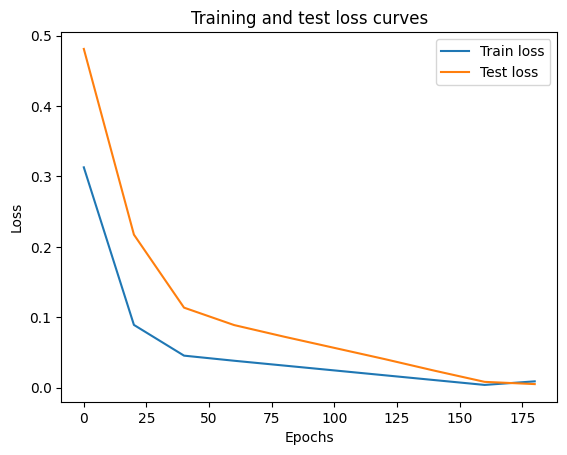

In [ ]:
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

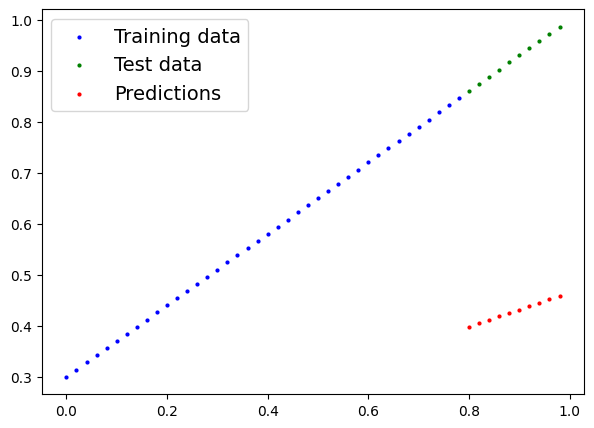

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
plot_predictions(predictions=y_preds) # Without training

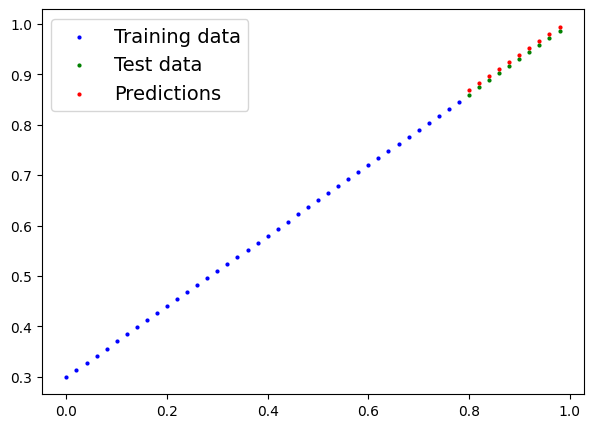

In [ ]:
plot_predictions(predictions=y_preds_new) # After training

## 5 - Saving & loading a model in Pytorch

1 - torch.save() : save a PyTorch object in python pickle format

2 - torch.load() : load a saved PyTorch object

3 - torch.nn.Module.load_stat_dict() : allows to load a model's saved stat dict

### Saving a PyTorch model :

Save only the state_dict

In [ ]:
#Saving pytorch model
from pathlib import Path

# Create model directory :
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# Create a model save path :
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state_dict : (recommended compared to saving all the mdoel)
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


### Loading a PyTorch model :

Create a new instance of our model class and load the saved state_dict() into that

In [ ]:
loaded_model_0=LinearRegressionModel()

#Load the saved state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# Extra : Autre méthode pour build model :

In [ ]:
class LinearRegressionModelV2 (nn.Module) :
  def __init__(self) :
    super().__init__()
    # Using nn.Linear to define the parameter implicitly; we initialise layer and not the parameter ourselves
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Exercices :

https://www.learnpytorch.io/01_pytorch_workflow/#exercises

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.3
bias= 0.9

start = 0
end=1
step=0.01

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

split=int(len(X)*0.8)
X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]

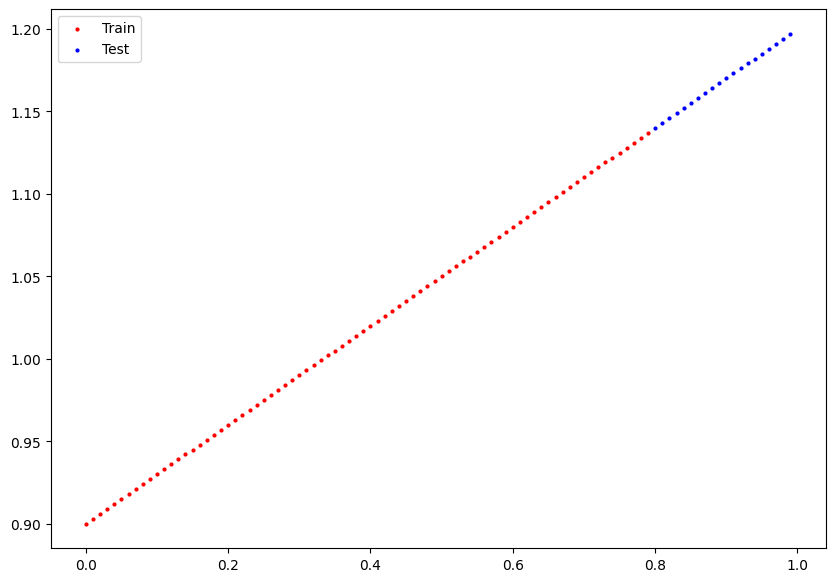

In [ ]:
def plot_pred(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,pred=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c='r',s=4,label="Train")
  plt.scatter(X_test,y_test,c='b',s=4,label='Test')

  if pred is not None :
    plt.scatter(X_test,pred,c='g',s=4,label="Predictions")
  plt.legend()

plot_pred()

In [ ]:
class LinearRegressionModelV3(nn.Module) :
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

    #self.weight=nn.Parameter(torch.randn(1),requires_grad=True)
    #self.bias=nn.Parameter(torch.randn(1),requires_grad=True)

  def forward(self, x:torch.Tensor)-> torch.Tensor :
    return self.linear_layer(x)

    #return self.weight*x+self.bias

In [ ]:
model_2=LinearRegressionModelV3()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4822]])),
             ('linear_layer.bias', tensor([-0.1412]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
epochs=300

for epoch in range(epochs):
  model_2.train()

  y_pred=model_2(X_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ##Testing :

  if epoch%20==0 :
    model_2.eval()
    with torch.inference_mode() :
      y_pred=model_2(X_test)

      loss_test=loss_fn(y_pred,y_test)
      print(f'Epoch: {epoch} | Train loss : {loss:.3f} | Test loss : {loss_test:.3f}')

Epoch: 0 | Train loss : 0.008 | Test loss : 0.007
Epoch: 20 | Train loss : 0.008 | Test loss : 0.007
Epoch: 40 | Train loss : 0.008 | Test loss : 0.007
Epoch: 60 | Train loss : 0.008 | Test loss : 0.007
Epoch: 80 | Train loss : 0.008 | Test loss : 0.007
Epoch: 100 | Train loss : 0.008 | Test loss : 0.007
Epoch: 120 | Train loss : 0.008 | Test loss : 0.007
Epoch: 140 | Train loss : 0.008 | Test loss : 0.007
Epoch: 160 | Train loss : 0.008 | Test loss : 0.007
Epoch: 180 | Train loss : 0.008 | Test loss : 0.007
Epoch: 200 | Train loss : 0.008 | Test loss : 0.007
Epoch: 220 | Train loss : 0.008 | Test loss : 0.007
Epoch: 240 | Train loss : 0.008 | Test loss : 0.007
Epoch: 260 | Train loss : 0.008 | Test loss : 0.007
Epoch: 280 | Train loss : 0.008 | Test loss : 0.007


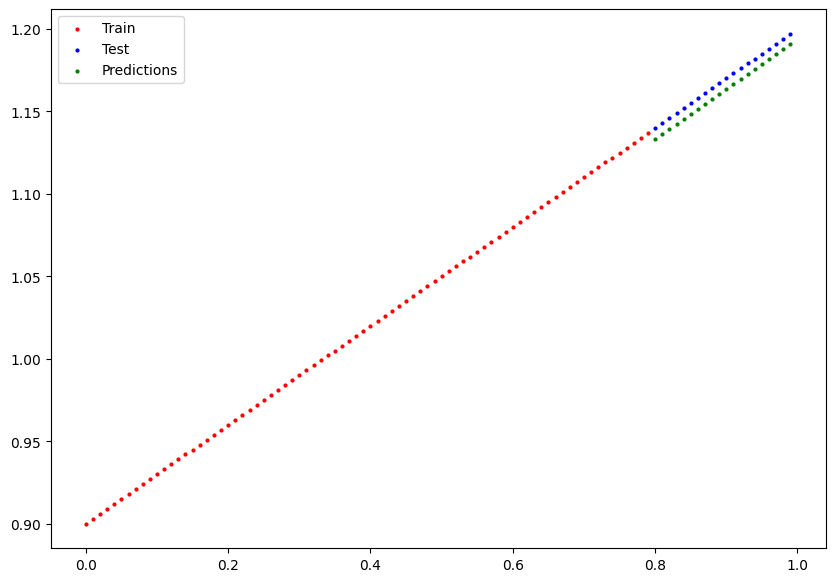

In [ ]:
model_2.eval()
with torch.inference_mode() :
   y_pred=model_2(X_test)
plot_pred(pred=y_pred)

In [ ]:
from pathlib import Path

MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01_PyTorch_model3"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),f = MODEL_SAVE_PATH)

Saving model to Models/01_PyTorch_model3


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModelV3()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_pred == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3027]])),
             ('linear_layer.bias', tensor([0.8911]))])